In [1]:
import xarray as xr
import cartopy
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from matplotlib.collections import PatchCollection
from dask.distributed import Client, wait
from matplotlib.patches import Polygon
#import cmocea
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Open files

In [2]:
relconc_05m_07 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_05m/040.1_connectivity_analysis_05_00-07days.nc")

In [3]:
relconc_05m_14 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_05m/040.1_connectivity_analysis_05_07-14days.nc")

In [4]:
relconc_05m_28 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_05m/040.1_connectivity_analysis_05_07-28days.nc")

In [5]:
relconc_10m_07 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_10m/040.1_connectivity_analysis_05_00-07days.nc")

In [6]:
relconc_10m_14 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_10m/040.1_connectivity_analysis_05_07-14days.nc")

In [7]:
relconc_10m_28 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_10m/040.1_connectivity_analysis_05_07-28days.nc")

In [8]:
relconc_15m_07 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_15m/040.1_connectivity_analysis_05_00-07days.nc")

In [9]:
relconc_15m_14 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_15m/040.1_connectivity_analysis_05_07-14days.nc")

In [10]:
relconc_15m_28 = xr.open_dataset("/gxfs_work/geomar/smomw400/git_projects/2022_north-sea_oysters/output_data/040.1_connectivity_analysis_15m/040.1_connectivity_analysis_05_07-28days.nc")

In [11]:
relconc_05m_07 = relconc_05m_07[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_05m_14 = relconc_05m_14[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_05m_28 = relconc_05m_28[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()

relconc_10m_07 = relconc_10m_07[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_10m_14 = relconc_10m_14[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_10m_28 = relconc_10m_28[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()

relconc_15m_07 = relconc_15m_07[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_15m_14 = relconc_15m_14[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()
relconc_15m_28 = relconc_15m_28[['obs_per_origin_area', 'hex1']].to_dataframe().reset_index()

### 00-07

In [28]:
merged_data = pd.merge(
    relconc_05m_07, 
    relconc_10m_07, 
    on='hex1', 
    suffixes=('_05m_07', '_10m_07'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_07'] = merged_data['obs_per_origin_area_05m_07'].fillna(0)
merged_data['obs_per_origin_area_10m_07'] = merged_data['obs_per_origin_area_10m_07'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_07,lon_hex1_05m_07,lat_hex1_05m_07,obs_per_origin_area_10m_07,lon_hex1_10m_07,lat_hex1_10m_07
0,"(-1, -19, 20)",0.0,-3.215782,51.464504,0.0,-3.215782,51.464504
1,"(-1, -2, 3)",0.0,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.0,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.0,-3.214311,51.153035,0.0,-3.214311,51.153035
4,"(-1, -24, 25)",0.0,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8408,"(9, 5, -14)",0.0,-0.838398,55.959362,0.0,-0.838398,55.959362
8409,"(9, 6, -15)",0.0,-0.829731,56.114857,0.0,-0.829731,56.114857
8410,"(9, 7, -16)",0.0,-0.820982,56.270351,0.0,-0.820982,56.270351
8411,"(9, 8, -17)",0.0,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.9945460153922195
Intercept: -0.684531402547508


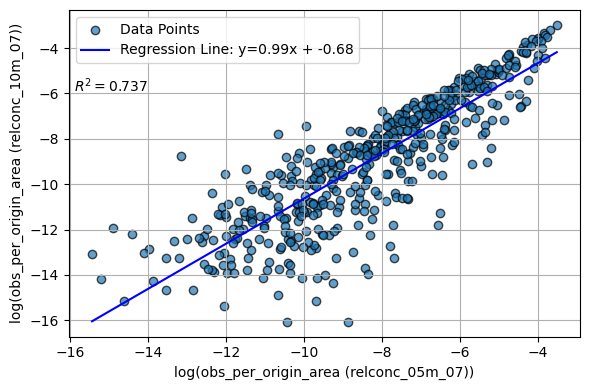

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_07'].values
y = merged_data['obs_per_origin_area_10m_07'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_07', 'obs_per_origin_area_10m_07'])
x = valid_data['obs_per_origin_area_05m_07'].values
y = valid_data['obs_per_origin_area_10m_07'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_07))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_07))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

plt.savefig("plots/regression_05m-10m_07.pdf", dpi=300)

In [30]:
merged_data = pd.merge(
    relconc_05m_07, 
    relconc_15m_07, 
    on='hex1', 
    suffixes=('_05m_07', '_15m_07'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_07'] = merged_data['obs_per_origin_area_05m_07'].fillna(0)
merged_data['obs_per_origin_area_15m_07'] = merged_data['obs_per_origin_area_15m_07'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_07,lon_hex1_05m_07,lat_hex1_05m_07,obs_per_origin_area_15m_07,lon_hex1_15m_07,lat_hex1_15m_07
0,"(-1, -19, 20)",0.0,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.0,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.0,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.0,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",0.0,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8415,"(9, 5, -14)",0.0,-0.838398,55.959362,0.0,-0.838398,55.959362
8416,"(9, 6, -15)",0.0,-0.829731,56.114857,0.0,-0.829731,56.114857
8417,"(9, 7, -16)",0.0,-0.820982,56.270351,0.0,-0.820982,56.270351
8418,"(9, 8, -17)",0.0,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.8895164902881185
Intercept: -1.636936771502687
R-squared: 0.523
p-value: 7.132e-55
Standard Error: 0.047


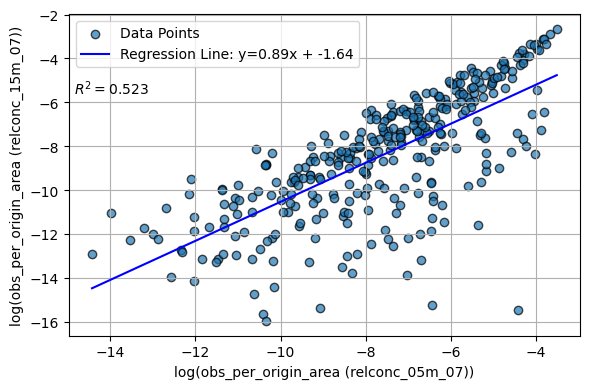

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_07'].values
y = merged_data['obs_per_origin_area_15m_07'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_07', 'obs_per_origin_area_15m_07'])
x = valid_data['obs_per_origin_area_05m_07'].values
y = valid_data['obs_per_origin_area_15m_07'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_07))')
plt.ylabel('log(obs_per_origin_area (relconc_15m_07))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_05m-15m_07.pdf", dpi=300)

In [32]:
merged_data = pd.merge(
    relconc_10m_07, 
    relconc_15m_07, 
    on='hex1', 
    suffixes=('_10m_07', '_15m_07'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_10m_07'] = merged_data['obs_per_origin_area_10m_07'].fillna(0)
merged_data['obs_per_origin_area_15m_07'] = merged_data['obs_per_origin_area_15m_07'].fillna(0)
merged_data

,hex1,obs_per_origin_area_10m_07,lon_hex1_10m_07,lat_hex1_10m_07,obs_per_origin_area_15m_07,lon_hex1_15m_07,lat_hex1_15m_07
0,"(-1, -19, 20)",0.0,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.0,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.0,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.0,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",0.0,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8345,"(9, 5, -14)",0.0,-0.838398,55.959362,0.0,-0.838398,55.959362
8346,"(9, 6, -15)",0.0,-0.829731,56.114857,0.0,-0.829731,56.114857
8347,"(9, 7, -16)",0.0,-0.820982,56.270351,0.0,-0.820982,56.270351
8348,"(9, 8, -17)",0.0,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.7611309771626762
Intercept: -1.3994783774142565
R-squared: 0.750
p-value: 1.138e-101
Standard Error: 0.024


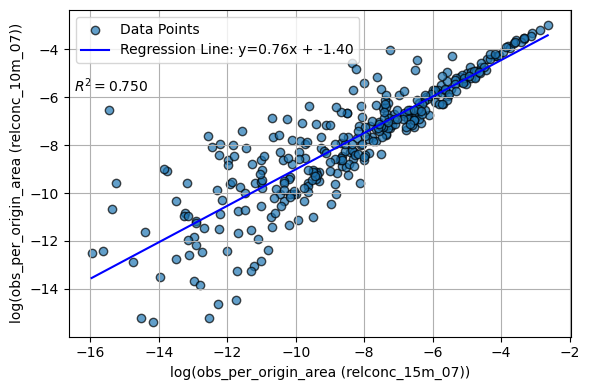

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_15m_07'].values
y = merged_data['obs_per_origin_area_10m_07'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_15m_07', 'obs_per_origin_area_10m_07'])
x = valid_data['obs_per_origin_area_15m_07'].values
y = valid_data['obs_per_origin_area_10m_07'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_15m_07))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_07))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_10m-15m_07.pdf", dpi=300)

### 07-14

In [34]:
merged_data = pd.merge(
    relconc_05m_14, 
    relconc_10m_14, 
    on='hex1', 
    suffixes=('_05m_14', '_10m_14'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_14'] = merged_data['obs_per_origin_area_05m_14'].fillna(0)
merged_data['obs_per_origin_area_10m_14'] = merged_data['obs_per_origin_area_10m_14'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_14,lon_hex1_05m_14,lat_hex1_05m_14,obs_per_origin_area_10m_14,lon_hex1_10m_14,lat_hex1_10m_14
0,"(-1, -19, 20)",0.000000e+00,-3.215782,51.464504,0.0,-3.215782,51.464504
1,"(-1, -2, 3)",0.000000e+00,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.000000e+00,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.000000e+00,-3.214311,51.153035,0.0,-3.214311,51.153035
4,"(-1, -24, 25)",1.280981e-07,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8408,"(9, 5, -14)",0.000000e+00,-0.838398,55.959362,0.0,-0.838398,55.959362
8409,"(9, 6, -15)",0.000000e+00,-0.829731,56.114857,0.0,-0.829731,56.114857
8410,"(9, 7, -16)",0.000000e+00,-0.820982,56.270351,0.0,-0.820982,56.270351
8411,"(9, 8, -17)",0.000000e+00,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.9413926320727629
Intercept: -1.0885995452323574
R-squared: 0.670
p-value: 4.617e-169
Standard Error: 0.025


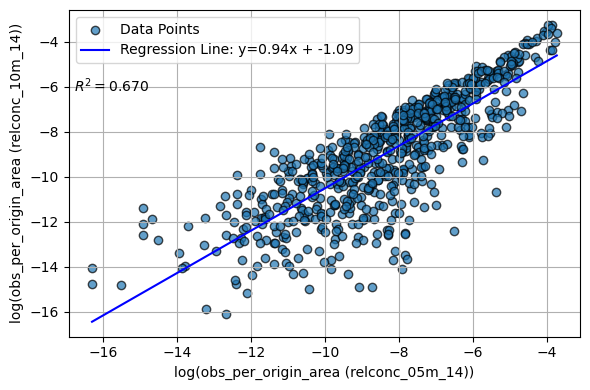

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_14'].values
y = merged_data['obs_per_origin_area_10m_14'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_14', 'obs_per_origin_area_10m_14'])
x = valid_data['obs_per_origin_area_05m_14'].values
y = valid_data['obs_per_origin_area_10m_14'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_14))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_14))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_05m-10m_14.pdf", dpi=300)

In [36]:
merged_data = pd.merge(
    relconc_05m_14, 
    relconc_15m_14, 
    on='hex1', 
    suffixes=('_05m_14', '_15m_14'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_14'] = merged_data['obs_per_origin_area_05m_14'].fillna(0)
merged_data['obs_per_origin_area_15m_14'] = merged_data['obs_per_origin_area_15m_14'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_14,lon_hex1_05m_14,lat_hex1_05m_14,obs_per_origin_area_15m_14,lon_hex1_15m_14,lat_hex1_15m_14
0,"(-1, -19, 20)",0.000000e+00,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.000000e+00,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.000000e+00,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.000000e+00,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",1.280981e-07,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8415,"(9, 5, -14)",0.000000e+00,-0.838398,55.959362,0.0,-0.838398,55.959362
8416,"(9, 6, -15)",0.000000e+00,-0.829731,56.114857,0.0,-0.829731,56.114857
8417,"(9, 7, -16)",0.000000e+00,-0.820982,56.270351,0.0,-0.820982,56.270351
8418,"(9, 8, -17)",0.000000e+00,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.7801738187352318
Intercept: -2.34153792513992
R-squared: 0.455
p-value: 6.631e-63
Standard Error: 0.040


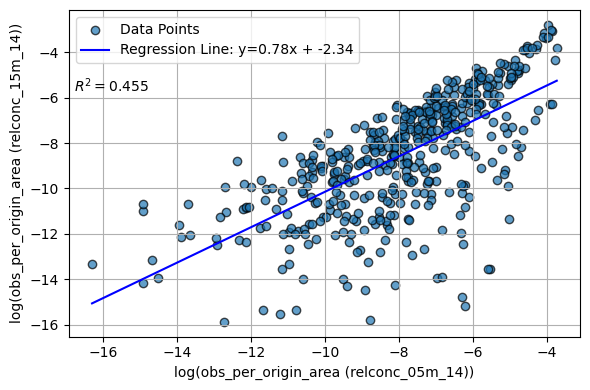

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_14'].values
y = merged_data['obs_per_origin_area_15m_14'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_14', 'obs_per_origin_area_15m_14'])
x = valid_data['obs_per_origin_area_05m_14'].values
y = valid_data['obs_per_origin_area_15m_14'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_14))')
plt.ylabel('log(obs_per_origin_area (relconc_15m_14))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_05m-15m_14.pdf", dpi=300)

In [38]:
merged_data = pd.merge(
    relconc_10m_14, 
    relconc_15m_14, 
    on='hex1', 
    suffixes=('_10m_14', '_15m_14'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_10m_14'] = merged_data['obs_per_origin_area_10m_14'].fillna(0)
merged_data['obs_per_origin_area_15m_14'] = merged_data['obs_per_origin_area_15m_14'].fillna(0)
merged_data

,hex1,obs_per_origin_area_10m_14,lon_hex1_10m_14,lat_hex1_10m_14,obs_per_origin_area_15m_14,lon_hex1_15m_14,lat_hex1_15m_14
0,"(-1, -19, 20)",0.0,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.0,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.0,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.0,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",0.0,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8345,"(9, 5, -14)",0.0,-0.838398,55.959362,0.0,-0.838398,55.959362
8346,"(9, 6, -15)",0.0,-0.829731,56.114857,0.0,-0.829731,56.114857
8347,"(9, 7, -16)",0.0,-0.820982,56.270351,0.0,-0.820982,56.270351
8348,"(9, 8, -17)",0.0,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.710800659259198
Intercept: -1.9180309295404907
R-squared: 0.680
p-value: 2.996e-116
Standard Error: 0.023


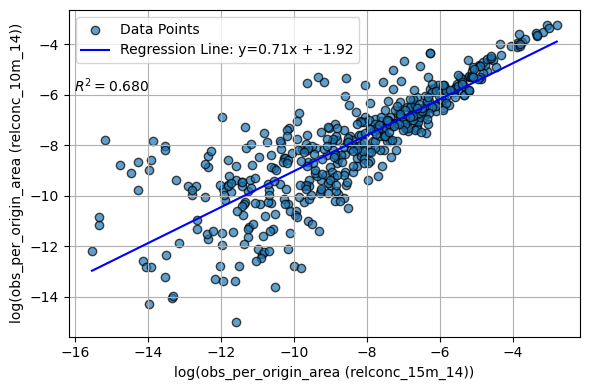

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_15m_14'].values
y = merged_data['obs_per_origin_area_10m_14'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_15m_14', 'obs_per_origin_area_10m_14'])
x = valid_data['obs_per_origin_area_15m_14'].values
y = valid_data['obs_per_origin_area_10m_14'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_15m_14))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_14))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_10m-15m_14.pdf", dpi=300)

### 07-28

In [40]:
merged_data = pd.merge(
    relconc_05m_28, 
    relconc_10m_28, 
    on='hex1', 
    suffixes=('_05m_28', '_10m_28'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_28'] = merged_data['obs_per_origin_area_05m_28'].fillna(0)
merged_data['obs_per_origin_area_10m_28'] = merged_data['obs_per_origin_area_10m_28'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_28,lon_hex1_05m_28,lat_hex1_05m_28,obs_per_origin_area_10m_28,lon_hex1_10m_28,lat_hex1_10m_28
0,"(-1, -19, 20)",0.000000,-3.215782,51.464504,0.000000e+00,-3.215782,51.464504
1,"(-1, -2, 3)",0.000000,-3.229353,54.110720,0.000000e+00,-3.229353,54.110720
2,"(-1, -20, 21)",0.000000,-3.215043,51.308774,0.000000e+00,-3.215043,51.308774
3,"(-1, -21, 22)",0.000000,-3.214311,51.153035,0.000000e+00,-3.214311,51.153035
4,"(-1, -24, 25)",0.000004,-3.212150,50.685757,6.223382e-07,-3.212150,50.685757
...,...,...,...,...,...,...,...
8408,"(9, 5, -14)",0.000000,-0.838398,55.959362,0.000000e+00,-0.838398,55.959362
8409,"(9, 6, -15)",0.000000,-0.829731,56.114857,0.000000e+00,-0.829731,56.114857
8410,"(9, 7, -16)",0.000000,-0.820982,56.270351,0.000000e+00,-0.820982,56.270351
8411,"(9, 8, -17)",0.000000,-0.812150,56.425843,0.000000e+00,-0.812150,56.425843


Slope: 0.955739889894572
Intercept: -0.9895104089902524
R-squared: 0.685
p-value: 3.752e-247
Standard Error: 0.021


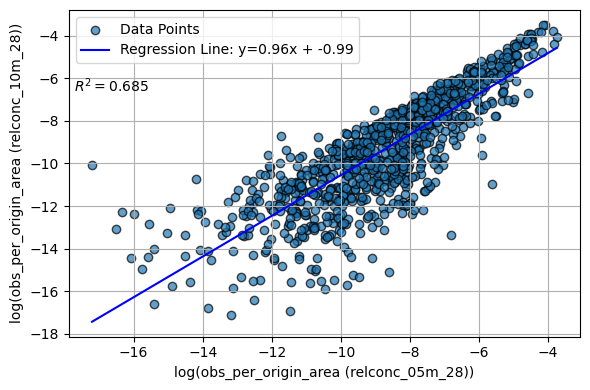

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_28'].values
y = merged_data['obs_per_origin_area_10m_28'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_28', 'obs_per_origin_area_10m_28'])
x = valid_data['obs_per_origin_area_05m_28'].values
y = valid_data['obs_per_origin_area_10m_28'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_28))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_28))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_05m-10m_28.pdf", dpi=300)

In [42]:
merged_data = pd.merge(
    relconc_05m_28, 
    relconc_15m_28, 
    on='hex1', 
    suffixes=('_05m_28', '_15m_28'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_05m_28'] = merged_data['obs_per_origin_area_05m_28'].fillna(0)
merged_data['obs_per_origin_area_15m_28'] = merged_data['obs_per_origin_area_15m_28'].fillna(0)
merged_data

,hex1,obs_per_origin_area_05m_28,lon_hex1_05m_28,lat_hex1_05m_28,obs_per_origin_area_15m_28,lon_hex1_15m_28,lat_hex1_15m_28
0,"(-1, -19, 20)",0.000000,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.000000,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.000000,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.000000,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",0.000004,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8415,"(9, 5, -14)",0.000000,-0.838398,55.959362,0.0,-0.838398,55.959362
8416,"(9, 6, -15)",0.000000,-0.829731,56.114857,0.0,-0.829731,56.114857
8417,"(9, 7, -16)",0.000000,-0.820982,56.270351,0.0,-0.820982,56.270351
8418,"(9, 8, -17)",0.000000,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.8461163218506038
Intercept: -1.8513410545494988
R-squared: 0.537
p-value: 2.023e-114
Standard Error: 0.030


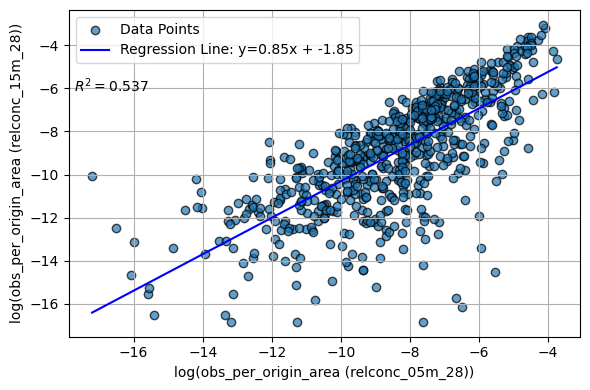

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_05m_28'].values
y = merged_data['obs_per_origin_area_15m_28'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_05m_28', 'obs_per_origin_area_15m_28'])
x = valid_data['obs_per_origin_area_05m_28'].values
y = valid_data['obs_per_origin_area_15m_28'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_05m_28))')
plt.ylabel('log(obs_per_origin_area (relconc_15m_28))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_05m-15m_28.pdf", dpi=300)

In [44]:
merged_data = pd.merge(
    relconc_10m_28, 
    relconc_15m_28, 
    on='hex1', 
    suffixes=('_10m_28', '_15m_28'), 
    how='outer'
)

# Filling NaN values in the obs_per_origin_area columns with 0
merged_data['obs_per_origin_area_10m_28'] = merged_data['obs_per_origin_area_10m_28'].fillna(0)
merged_data['obs_per_origin_area_15m_28'] = merged_data['obs_per_origin_area_15m_28'].fillna(0)
merged_data

,hex1,obs_per_origin_area_10m_28,lon_hex1_10m_28,lat_hex1_10m_28,obs_per_origin_area_15m_28,lon_hex1_15m_28,lat_hex1_15m_28
0,"(-1, -19, 20)",0.000000e+00,-3.215782,51.464504,0.0,NaN,NaN
1,"(-1, -2, 3)",0.000000e+00,-3.229353,54.110720,0.0,-3.229353,54.110720
2,"(-1, -20, 21)",0.000000e+00,-3.215043,51.308774,0.0,-3.215043,51.308774
3,"(-1, -21, 22)",0.000000e+00,-3.214311,51.153035,0.0,NaN,NaN
4,"(-1, -24, 25)",6.223382e-07,-3.212150,50.685757,0.0,-3.212150,50.685757
...,...,...,...,...,...,...,...
8345,"(9, 5, -14)",0.000000e+00,-0.838398,55.959362,0.0,-0.838398,55.959362
8346,"(9, 6, -15)",0.000000e+00,-0.829731,56.114857,0.0,-0.829731,56.114857
8347,"(9, 7, -16)",0.000000e+00,-0.820982,56.270351,0.0,-0.820982,56.270351
8348,"(9, 8, -17)",0.000000e+00,-0.812150,56.425843,0.0,-0.812150,56.425843


Slope: 0.7616249385410797
Intercept: -1.6564876523992282
R-squared: 0.753
p-value: 3.894e-209
Standard Error: 0.017


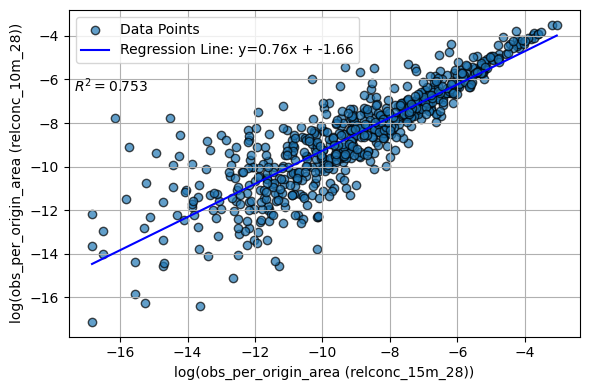

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the columns are numeric and handle zeros if necessary
x = merged_data['obs_per_origin_area_15m_28'].values
y = merged_data['obs_per_origin_area_10m_28'].values

# Handling zeros (if present)
x[x <= 0] = np.nan  # Setting non-positive values to NaN
y[y <= 0] = np.nan
# Dropping NaNs
valid_data = merged_data.dropna(subset=['obs_per_origin_area_15m_28', 'obs_per_origin_area_10m_28'])
x = valid_data['obs_per_origin_area_15m_28'].values
y = valid_data['obs_per_origin_area_10m_28'].values

# Log transform the data
log_x = np.log(x)
log_y = np.log(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Calculate R-squared
r_squared = r_value**2

# Create values for the regression line
x_vals = np.linspace(log_x.min(), log_x.max(), 100)
y_vals = slope * x_vals + intercept

# Plot the original data and the regression line
plt.figure(figsize=(6,4))
plt.scatter(log_x, log_y, alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('log(obs_per_origin_area (relconc_15m_28))')
plt.ylabel('log(obs_per_origin_area (relconc_10m_28))')

# Show R-squared on the plot
plt.text(0.01, 0.75, f'$R^2={r_squared:.3f}$', fontsize=10, transform=plt.gca().transAxes)

# Add grid and legend
plt.grid()
plt.legend()
plt.tight_layout()

# Print additional statistics
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared:.3f}')
print(f'p-value: {p_value:.3e}')
print(f'Standard Error: {std_err:.3f}')

plt.savefig("plots/regression_10m-15m_28.pdf", dpi=300)